# Practica 2
#### Mauricio Santiago Valdovinos Morales
#### Carlos Xavier Gallardo Rosas
#### Sergio Alberto Arce Ruelas

In [52]:
#Importar el OBO parser de la libreria goatools
from goatools import obo_parser
#Para dercargar el GO OBO se necesitan las librerias wget y el os
import wget
import os
#os.environ["PATH"] += os.pathsep + 'C:Program Files (x86)/Graphviz2.38/bin/'
#Para Crear la imagen del ejercicio 2.2 
from IPython.display import Image
#Ejercicio 2.3
from future.standard_library import install_aliases
from urllib.request import urlopen
import xmltodict
#Seccion 3
import Bio.UniProt.GOA as GOA
import os
from ftplib import FTP
import gzip
import asciitable

In [53]:
go_obo_url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
data_folder = os.getcwd() + '/data'

#Revisar si ya tenemos la carpeta ./data
if(not os.path.isfile(data_folder)):
    try:
        os.mkdir(data_folder)
    except OSError as e:
        if(e.errno != 17):
            raise e
else:
    raise Exception('Data path (' + data_folder + ') exist as file')

#Revisar si ya tenemos el archivo
if(not os.path.isfile(data_folder+'/go-basic.obo')):
    go_obo = wget.download(go_obo_url, data_folder+'/go-basic.obo')
else:
    go_obo = data_folder + '/go-basic.obo'

In [54]:
print(go_obo)

C:\Users\Carlos\Documents\UNI\6to Sem\IA/data/go-basic.obo


In [55]:
go = obo_parser.GODag(go_obo)

load obo file C:\Users\Carlos\Documents\UNI\6to Sem\IA/data/go-basic.obo
C:\Users\Carlos\Documents\UNI\6to Sem\IA/data/go-basic.obo: fmt(1.2) rel(2018-04-15) 44,928 GO Terms


# Ejercicio 2.1

In [56]:
def transitive_closure(go_term, go):
    go_term_set = set()
    find_parents(go_term, go, go_term_set)
    find_childrens(go_term, go, go_term_set)
    return go_term_set

def find_parents(term1, go, go_term_set={}, ret=False):
    for term2 in term1.parents:
        go_term_set.update({term2})
        
        #Recursividad
        find_parents(term2,go, go_term_set)
    if(ret):
        return go_term_set
def find_childrens(term1, go, go_term_set={}, ret=False):
    for term2 in term1.children:
        go_term_set.update({term2})
        
        #Recursividad
        find_childrens(term2,go, go_term_set)
    if(ret):
        return go_term_set

def common_parent_go_ids(terms, go):
    '''
        Esta funcion encuentra los ancestros en comun en el arbol de GO de la lista de terminos de la intr
    '''
    #Encontrar primero los candidatos
    rec = go[terms[0]]
    candidates = rec.get_all_parents()
    candidates.update({terms[0]})
    
    #Encontrar la interseccion 
    for term in terms[1:]:
        rec = go[term]
        parents = rec.get_all_parents()
        parents.update({term})
        
        #Encontrar la interseccion con los candidatos y actualizar
        candidates.intersection_update(parents)
    return candidates

def deepest_common_ancestor(terms, go):
    '''
        Esta funcion obtiene el antecesos comun mas cercano usando la funcion common_parent_go_ids
    '''
    #Toma el elemento con la profundidad maxima
    return max(common_parent_go_ids(terms, go), key=lambda t: go[t].depth)

In [57]:
go_id = 'GO:0048527'
go_term = go[go_id]
print(go_term,'\n')
#Pregunta 1
print('a) What is the name of the GO term GO:0048527?')
print('GO term name: {}'.format(go_term.name))
print('GO term namespace: {}'.format(go_term.namespace))

#Pregunta 2
print('\nb) What are the immediate parent(s) of the term GO:0048527?')
for term in go_term.parents:
    print(term)

#Pregunta 3
cont=0
print('\nc) What are the immediate children of the term GO:0048527?')
for term in go_term.children:
    cont+=1
    print(term)
if(cont==0):
    print("None")

#Pregunta 4
print('\nd) Recursively find all the parent and child terms of the term GO:0048527.')
#go_term_set = transitive_closure(go_term,go)
#for term in go_term_set:
 #   print(term)
rec = go[go_id]
parents = rec.get_all_parents()
childrens = rec.get_all_children()
for term in parents.union(childrens):
    print(go[term])
#Pregunta 5
print('\ne) How many GO terms have the word “growth” in their name?')
growth_count = 0
for go_term in go.values():
    if 'growth' in go_term.name:
        growth_count += 1
print('Number of GO term with "growth" in their names: {}'.format(growth_count))

#Pregunta 6
print('\nf) What is the deepest common ancestor term of GO:0048527 and GO:0097178?')
go_id1 = 'GO:0097178'
go_id_id1_dca = deepest_common_ancestor([go_id, go_id1], go)
print('El ancestro comun mas profundo de\n\t{} ({})\ny\n\t{} ({})\nes\n\t{} ({})'
      .format(go_id, go[go_id].name,go_id1, go[go_id1].name, go_id_id1_dca, go[go_id_id1_dca].name,))



GO:0048527	level-05	depth-06	lateral root development [biological_process] 

a) What is the name of the GO term GO:0048527?
GO term name: lateral root development
GO term namespace: biological_process

b) What are the immediate parent(s) of the term GO:0048527?
GO:0048528	level-04	depth-05	post-embryonic root development [biological_process]

c) What are the immediate children of the term GO:0048527?
None

d) Recursively find all the parent and child terms of the term GO:0048527.
GO:0048364	level-04	depth-04	root development [biological_process]
GO:0032502	level-01	depth-01	developmental process [biological_process]
GO:0090696	level-03	depth-04	post-embryonic plant organ development [biological_process]
GO:0048856	level-02	depth-02	anatomical structure development [biological_process]
GO:0048528	level-04	depth-05	post-embryonic root development [biological_process]
GO:0099402	level-03	depth-03	plant organ development [biological_process]
GO:0008150	level-00	depth-00	biological_process 

# Ejercicio 2.2

lineage info for terms ['GO:0097192'] written to GO:0097192-lineage.png


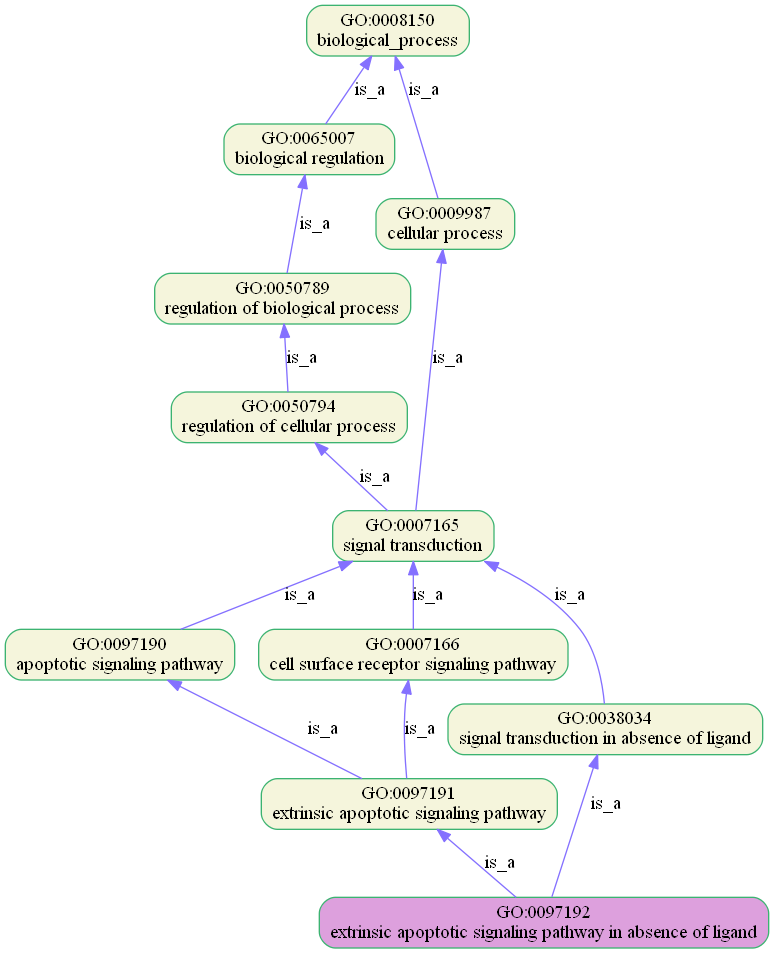

In [58]:
#for the GO term GO:0097190. From the visualisation, what is the name of this term?
go_id2 = 'GO:0097192'
rec = go[go_id2]
lineage_png = go_id2 + '-lineage.png'
go.draw_lineage([rec], lineage_img=lineage_png)
Image(lineage_png)

# Ejercicio 2.3

In [59]:
install_aliases()

def get_oboxml(go_id):
    """
        This function retrieves the OBO-XML for a given Gene Ontology term,
        using EMBL-EBI's QuickGO browser.
        Input: go_id - a valid Gene Ontology ID, e.g. GO:0048527.
    """
    quickgo_url = "http://www.ebi.ac.uk/QuickGO/GTerm?id="+ go_id+"&format=oboxml"
    oboxml = urlopen(quickgo_url)
    
    # Check the response
    if(oboxml.getcode() == 200):
        obodict = xmltodict.parse(oboxml.read())
        return obodict
    else:
        raise ValueError("Couldn't receive OBOXML from QuickGO. Check GO ID and try again.")

In [66]:
go_id = 'GO:0048527'
obo_dict = {
  "numberOfHits": 1,
  "results":
    {
      "id": "GO:0048527",
      "isObsolete": False,
      "name": "lateral root development",
      "definition": 
	  {
        "text": "The process whose specific outcome is the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper."
      },
      "children":
	  {
        "1":{"id": "GO:2000023","relation": "regulates"},
        "2":{"id": "GO:1901333","relation": "positively_regulates"},
        "3":{"id": "GO:0010102","relation": "part_of"},
        "4":{"id": "GO:1902089","relation": "part_of"},
        "5":{"id": "GO:1901332","relation": "negatively_regulates"}
      },
	  
      "history":
		{
			"stamp1":
				{
				  "timestamp": "2010-03-20",
				  "action": "Deleted",
				  "category": "RELATION",
				  "text": "is a GO:0048364 (root development)"
				},
			"stamp2":
				{
				  "timestamp": "2008-05-13",
				  "action": "Added",
				  "category": "DEFINITION",
				  "text": "The process whose specific outcome is the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper."
				},
			"stamp3":
				{
				  "timestamp": "2008-05-12",
				  "action": "Deleted",
				  "category": "DEFINITION",
				  "text": "The process whose specific outcome is the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper."
				},
			"stamp4":
				{
				  "timestamp": "2008-04-01",
				  "action": "Updated",
				  "category": "RELATION",
				  "text": "is a GO:0048364 (root development)"
				},
			"stamp5":
				{
				  "timestamp": "2008-04-01",
				  "action": "Updated",
				  "category": "RELATION",
				  "text": "is a GO:0048528 (post-embryonic root development)"
				},
			"stamp6":
				{
				  "timestamp": "2005-07-06",
				  "action": "Updated",
				  "category": "DEFINITION",
				  "text": "The process whose specific outcome is the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper."
				},
			"stamp7":
				{
				  "timestamp": "2005-06-16",
				  "action": "Updated",
				  "category": "DEFINITION",
				  "text": "The process aimed at the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper."
				},
			"stamp8":
				{
				  "timestamp": "2005-03-04",
				  "action": "Added",
				  "category": "TERM",
				  "text": "lateral root development"
				},
			"stamp9":
				{
				  "timestamp": "2005-03-04",
				  "action": "Added",
				  "category": "DEFINITION",
				  "text": "Processes aimed at the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper."
				}
		},
	  
      "xRelations": [
        {
          "id": "PO:0020121",
          "term": "lateral root",
          "namespace": "PO",
          "url": "https://www.ebi.ac.uk/ontology-lookup/?termId=PO:0020121",
          "relation": "results_in_development_of"
        }
      ],
      "taxonConstraints": [
        {
          "ancestorId": "GO:0032501",
          "ancestorName": "multicellular organismal process",
          "relationship": "never_in_taxon",
          "taxId": "4896",
          "taxIdType": "NCBITaxon",
          "taxName": "Schizosaccharomyces pombe"
        },
        {
          "ancestorId": "GO:0032501",
          "ancestorName": "multicellular organismal process",
          "relationship": "never_in_taxon",
          "taxId": "4932",
          "taxIdType": "NCBITaxon",
          "taxName": "Saccharomyces cerevisiae"
        },
        {
          "ancestorId": "GO:0048364",
          "ancestorName": "root development",
          "relationship": "only_in_taxon",
          "taxId": "33090",
          "taxIdType": "NCBITaxon",
          "taxName": "Viridiplantae"
        }
      ],
      "aspect": "biological_process",
      "usage": "Unrestricted",
      "blacklist": [
        {
          "goId": "GO:0048527",
          "reason": "1 NOT-qualified manual annotation exists with evidence code ECO:0000315 from this reference: PMID:9611176",
          "category": "NOT-qualified manual",
          "entityType": "protein",
          "entityId": "Q946J8",
          "taxonId": "3702",
          "entityName": "LHP1_ARATH",
          "ancestorGoId": "GO:0048364"
        }
      ]
    },
    
  "pageInfo": False
}

print(obo_dict)

{'results': {'taxonConstraints': [{'relationship': 'never_in_taxon', 'taxName': 'Schizosaccharomyces pombe', 'taxIdType': 'NCBITaxon', 'taxId': '4896', 'ancestorName': 'multicellular organismal process', 'ancestorId': 'GO:0032501'}, {'relationship': 'never_in_taxon', 'taxName': 'Saccharomyces cerevisiae', 'taxIdType': 'NCBITaxon', 'taxId': '4932', 'ancestorName': 'multicellular organismal process', 'ancestorId': 'GO:0032501'}, {'relationship': 'only_in_taxon', 'taxName': 'Viridiplantae', 'taxIdType': 'NCBITaxon', 'taxId': '33090', 'ancestorName': 'root development', 'ancestorId': 'GO:0048364'}], 'history': {'stamp9': {'category': 'DEFINITION', 'action': 'Added', 'timestamp': '2005-03-04', 'text': 'Processes aimed at the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper.'}, 'stamp3': {'categor

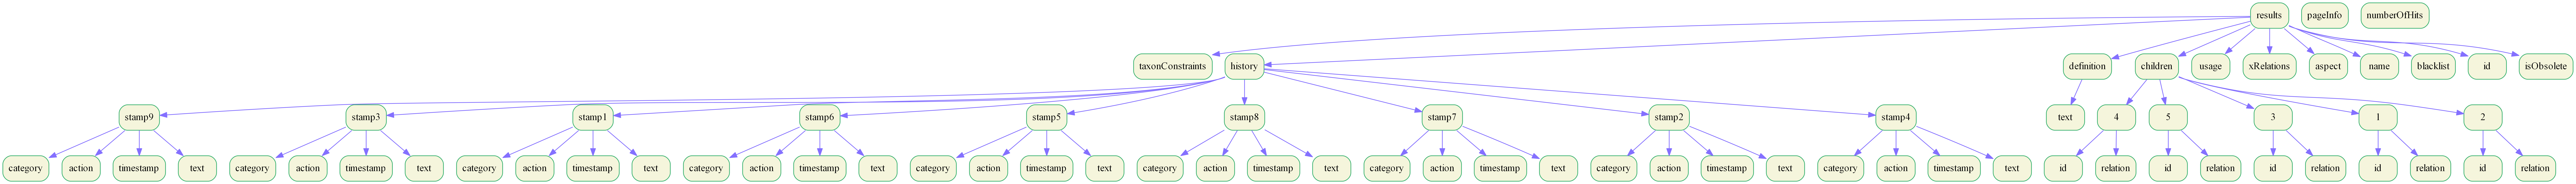

In [67]:
import visualisedictionary as vd

# Create pygraphviz graph with visualisedictionary.KeysGraph()
G = vd.KeysGraph(obo_dict)
# Draw and save this.
vd_filename = './OBOXML-Dictionary-' + go_id + '.png'
G.draw(vd_filename)

# Draw this image here.
Image(vd_filename)

lineage info for terms ['GO:0048527'] written to GO:0048527-lineage.png


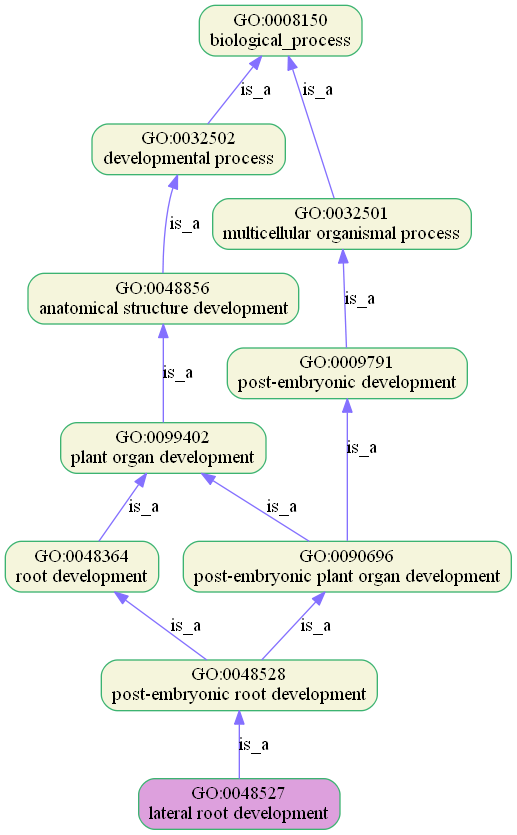

In [65]:
go_id2 = 'GO:0048527'
rec = go[go_id2]
lineage_png = go_id2 + '-lineage.png'
go.draw_lineage([rec], lineage_img=lineage_png)
Image(lineage_png)

# Sección 3

In [62]:
import os
from ftplib import FTP
arab_uri = '/pub/databases/GO/goa/ARABIDOPSIS/goa_arabidopsis.gaf.gz'
arab_fn = arab_uri.split('/')[-1]

# Check if the file exists already
arab_gaf = os.path.join(data_folder, arab_fn)
if(not os.path.isfile(arab_gaf)):
    # Login to FTP server
    ebi_ftp = FTP('ftp.ebi.ac.uk')
    ebi_ftp.login() # Logs in anonymously
    
    # Download
    with open(arab_gaf,'wb') as arab_fp:
        ebi_ftp.retrbinary('RETR {}'.format(arab_uri), arab_fp.write)
        
    # Logout from FTP server
    ebi_ftp.quit()

In [63]:

with gzip.open(arab_gaf, 'rt') as arab_gaf_fp:
    arab_funcs = {}
    
    for entry in GOA.gafiterator(arab_gaf_fp):
        uniprot_id = entry.pop('DB_Object_ID')
        arab_funcs[uniprot_id] = entry

print(arab_funcs[list(arab_funcs.keys())[0]])

{'DB_Object_Symbol': 'F10G19.2', 'Qualifier': [''], 'DB_Object_Type': 'protein', 'GO_ID': 'GO:0031225', 'DB:Reference': ['PMID:12805588'], 'Synonym': ['O23120_ARATH', 'F10G19.2', 'T26J12.18', 'At1g23040', 'F19G10.19'], 'Evidence': 'TAS', 'DB_Object_Name': 'At1g23040', 'Gene_Product_Form_ID': '', 'Assigned_By': 'TAIR', 'Taxon_ID': ['taxon:3702'], 'Aspect': 'C', 'With': [''], 'Annotation_Extension': '', 'DB': 'UniProtKB', 'Date': '20050304'}


# Ejercicio 3.1

In [64]:
print('a) Find the total number of annotations for Arabidopsis thaliana with NOT qualifiers. What is this as a percentage of the total number of annotations for this species')
not_count = 0
total_count = len(arab_funcs)
for func in arab_funcs.values():
    if 'NOT' in func['Qualifier']:
        not_count += 1
print('Total count of NOT qualifiers: {} ({}%)'.format(not_count, round(((float(not_count)/float(total_count))*100),2)))
print('Total number of annotations: {}'.format(total_count))

print('\nb) How many genes (of Arabidopsis thaliana) have the annotation GO:0048527 (lateral root development)?')
go_id = 'GO:0048527'
arab_tax_id = 3702
annot_count = 0
counted_gene = []
for uniprot_id in arab_funcs:
    if('taxon:' + str(arab_tax_id) in arab_funcs[uniprot_id]['Taxon_ID']):
        if(arab_funcs[uniprot_id]['GO_ID'] == go_id):
            counted_gene.append(uniprot_id)
            annot_count +=1
del counted_gene
print(annot_count)

print('\nc) Generate a list of annotated proteins which have the word “growth” in their name.')
keyword = 'growth'
growth_dict = {x: arab_funcs[x]
               for x in arab_funcs 
               if keyword in arab_funcs[x]['DB_Object_Name']}

print('UniProt IDs of annotations with "growth" in their name:')
for annot in growth_dict:
    print("\t - " + annot)
print("Total: {}".format(len(growth_dict)))

print('\nd) There are 21 evidence codes used in the Gene Ontology project. As discussed in Chap. 3 [1], many of these are inferred, either by curators or automatically. Find the counts of each evidence code in the Arabidopsis thaliana annotation file')
evidence_count = {}
for annotation in arab_funcs:
    evidence = arab_funcs[annotation]['Evidence']
    if(evidence not in evidence_count):
        evidence_count[evidence] = 1
    else:
        evidence_count[evidence] += 1
table_data = [['Evidence Code', 'Count']]
for code in sorted(evidence_count.keys()):
    table_data.append([code, str(evidence_count[code])])
print(asciitable.write(table_data))
print(table_data)


evidence_percent = {}
for code in evidence_count:
        evidence_percent[code] = ((float(evidence_count[code]) /float(total_count))*100)

table_data = [['Evidence Code', 'Count', 'Percentage (%)']]
for code in sorted(evidence_count.keys()):
    table_data.append([code, str(evidence_count[code]), str(round(evidence_percent[code],2))])
print(asciitable.write(table_data))

a) Find the total number of annotations for Arabidopsis thaliana with NOT qualifiers. What is this as a percentage of the total number of annotations for this species
Total count of NOT qualifiers: 1143 (4.53%)
Total number of annotations: 25241

b) How many genes (of Arabidopsis thaliana) have the annotation GO:0048527 (lateral root development)?
20

c) Generate a list of annotated proteins which have the word “growth” in their name.
UniProt IDs of annotations with "growth" in their name:
	 - Q3C1C7
	 - Q9SI57
	 - Q9FHF5
	 - Q6NNL3
	 - A0A1P8B471
	 - Q6ID76
	 - F4KHI3
	 - Q93VK8
	 - Q9FGF6
	 - Q9LI64
	 - B3H5J1
	 - Q6DSU1
	 - Q3E880
Total: 13

d) There are 21 evidence codes used in the Gene Ontology project. As discussed in Chap. 3 [1], many of these are inferred, either by curators or automatically. Find the counts of each evidence code in the Arabidopsis thaliana annotation file
col1 col2
"Evidence Code" Count
IBA 3673
IDA 2117
IEA 11687
IEP 572
IGI 274
IMP 2038
IPI 221
IRD 1
ISS 35